In [1]:
from tensorflow.keras.datasets.cifar10 import load_data
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Input, Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model, Sequential
import tensorflow as tf
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.applications import MobileNet

In [2]:
def display_img(img_set, title_set):
  n = len(title_set)
  for i in range(n):
    plt.subplot(3, 3, i + 1)
    plt.imshow(img_set[i], cmap = 'gray')
    plt.title(title_set[i])
  plt.show()
  plt.close()

X_train.shape: (50000, 32, 32, 3), y_train.shape: (50000, 1), X_test.shape: (10000, 32, 32, 3), y_test.shape: (10000, 1))
X_train.dtype: uint8, y_train.dtype: uint8, X_test.dtype: uint8, y_test.dtype: uint8
X_train.Range: 255 - 0, X_test.Range: 255 - 0


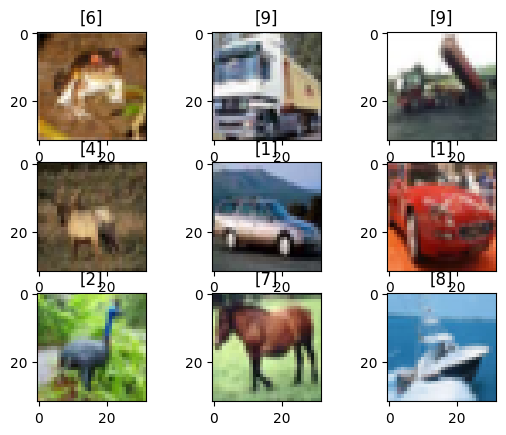

In [3]:
# Load data
(X_train, y_train), (X_test, y_test) = load_data()

# Investigate loaded data
print('X_train.shape: {}, y_train.shape: {}, X_test.shape: {}, y_test.shape: {})'.format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))
print('X_train.dtype: {}, y_train.dtype: {}, X_test.dtype: {}, y_test.dtype: {}'.format(X_train.dtype, y_train.dtype, X_test.dtype, y_test.dtype))
print('X_train.Range: {} - {}, X_test.Range: {} - {}'.format(X_train.max(), X_train.min(), X_test.max(), X_test.min()))

# Dispaly some loaded image data
display_img(X_train[:9], y_train[:9])

In [4]:


# Normalize values to range [-1, 1] (required)
# X_train = preprocess_input(X_train)
# X_test = preprocess_input(X_test)
X_train = X_train / 255.0
X_test = X_test / 255.0

y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print(f"x_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (50000, 32, 32, 3), y_train shape: (50000, 10)
x_test shape: (10000, 32, 32, 3), y_test shape: (10000, 10)


In [5]:
# load the mobilenet pretrained model
mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# freeze the base model to retain pretrained weights
# mobilenet_base.trainable = False

C:\Users\12\AppData\Local\Temp\ipykernel_5244\7061188.py:2: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  mobilenet_base = MobileNet(weights='imagenet', include_top=False, input_shape=(32, 32, 3))


In [6]:
mobilenet_base.trainable = True
for layer in mobilenet_base.layers[:-10]:  # Freeze all but the last 10 layers
    layer.trainable = False

In [7]:
# create model

# model = Sequential ([
#     mobilenet_base,
#     GlobalAveragePooling2D(),
#     Dropout(0.5),
#     Dense(128, activation='relu'),
#     Dropout(0.25),
#     Dense(10, activation='softmax', name='output')
# ])

inputs = mobilenet_base.input
x = mobilenet_base.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.25)(x)
outputs = Dense(10, activation='softmax', name='output')(x)
model = Model(inputs, outputs)

model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 16, 16, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 16, 16, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 8, 8, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 8, 8, 128)      │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 3,361,354 (12.82 MB)

 Trainable params: 1,720,714 (6.56 MB)

 Non-trainable params: 1,640,640 (6.26 MB)

In [8]:
# compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
history = model.fit(X_train, y_train, batch_size=64, validation_split=0.1, epochs=15)

Epoch 1/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 37s 48ms/step - accuracy: 0.4212 - loss: 1.9059 - val_accuracy: 0.5748 - val_loss: 1.2294
Epoch 2/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.6063 - loss: 1.1532 - val_accuracy: 0.6198 - val_loss: 1.1025
Epoch 3/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 33s 47ms/step - accuracy: 0.6421 - loss: 1.0502 - val_accuracy: 0.6416 - val_loss: 1.0344
Epoch 4/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.6641 - loss: 0.9784 - val_accuracy: 0.6588 - val_loss: 0.9911
Epoch 5/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.6850 - loss: 0.9202 - val_accuracy: 0.6720 - val_loss: 0.9575
Epoch 6/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 49ms/step - accuracy: 0.6977 - loss: 0.8774 - val_accuracy: 0.6482 - val_loss: 0.9839
Epoch 7/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 35s 49ms/step - accuracy: 0.7070 - loss: 0.8439 - val_accuracy: 0.6512 - val_loss: 1.0700
Epoch 8/15
704/704 ━━━━━━━━━━━━━━━━━━━━ 34s 48ms/step - accuracy: 0.7199 - loss: 0.8104 - 

In [10]:
# Evaluate model performance
model.evaluate(X_test, y_test)

# Predict Y values
y_predict = model.predict(X_test)

print('    y       y_predict')
print('=========   ==========')
for i in range(10):
  print(np.argmax(y_test[i]), '\t\t', np.argmax(y_predict[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.6579 - loss: 1.0852
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step
    y       y_predict
=========   ==========
3 		 5
8 		 8
8 		 8
0 		 0
6 		 4
6 		 6
1 		 1
6 		 2
3 		 3
1 		 1


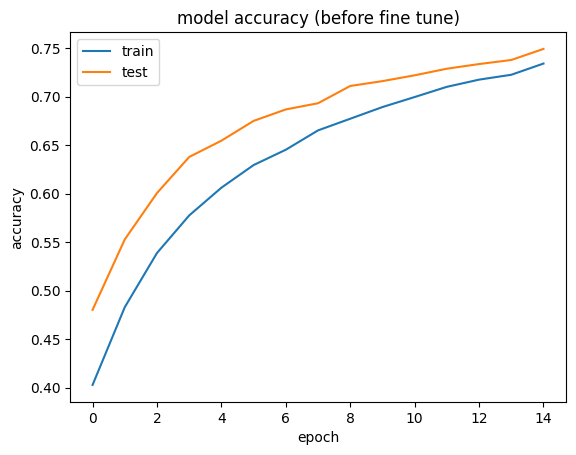

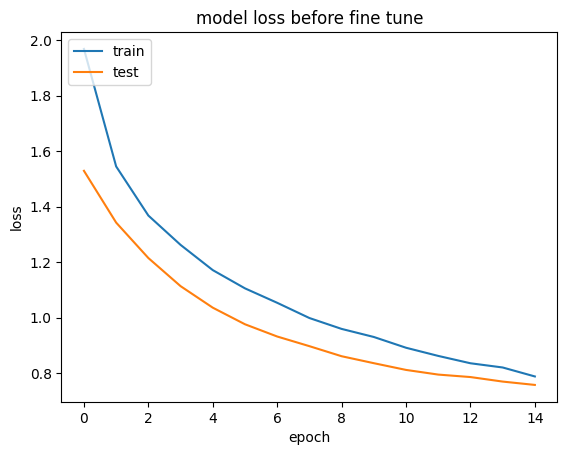

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy (before fine tune)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss (before fine tune)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Fine-Tuning

In [12]:

for layer in mobilenet_base.layers[:-10]:  # Unfreeze all but the last 10 layers
    layer.trainable = True
model.summary()



Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1 (Conv2D)                  │ (None, 16, 16, 32)     │           864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_bn (BatchNormalization)   │ (None, 16, 16, 32)     │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1_relu (ReLU)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1 (DepthwiseConv2D)     │ (None, 16, 16, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_bn                    │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_1_relu (ReLU)           │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1 (Conv2D)              │ (None, 16, 16, 64)     │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_bn                    │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_1_relu (ReLU)           │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pad_2 (ZeroPadding2D)      │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2 (DepthwiseConv2D)     │ (None, 8, 8, 64)       │           576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_bn                    │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_2_relu (ReLU)           │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2 (Conv2D)              │ (None, 8, 8, 128)      │         8,192 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_2_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3 (DepthwiseConv2D)     │ (None, 8, 8, 128)      │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_dw_3_relu (ReLU)           │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3 (Conv2D)              │ (None, 8, 8, 128)      │        16,384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_pw_3_bn                    │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │             

 Total params: 6,802,784 (25.95 MB)

 Trainable params: 3,339,466 (12.74 MB)

 Non-trainable params: 21,888 (85.50 KB)

 Optimizer params: 3,441,430 (13.13 MB)

In [13]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001), loss='categorical_crossentropy', metrics=['accuracy'])

# train the model 
history = model.fit(X_train, y_train, validation_split=0.1, batch_size=32, epochs=15)

Epoch 1/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 121s 78ms/step - accuracy: 0.3719 - loss: 2.2076 - val_accuracy: 0.4802 - val_loss: 1.5292
Epoch 2/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 111s 79ms/step - accuracy: 0.4708 - loss: 1.5992 - val_accuracy: 0.5528 - val_loss: 1.3424
Epoch 3/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 112s 79ms/step - accuracy: 0.5342 - loss: 1.3913 - val_accuracy: 0.6006 - val_loss: 1.2147
Epoch 4/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 110s 78ms/step - accuracy: 0.5718 - loss: 1.2818 - val_accuracy: 0.6378 - val_loss: 1.1133
Epoch 5/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 111s 79ms/step - accuracy: 0.6067 - loss: 1.1711 - val_accuracy: 0.6546 - val_loss: 1.0357
Epoch 6/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 110s 78ms/step - accuracy: 0.6245 - loss: 1.1121 - val_accuracy: 0.6750 - val_loss: 0.9758
Epoch 7/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 110s 78ms/step - accuracy: 0.6457 - loss: 1.0612 - val_accuracy: 0.6868 - val_loss: 0.9317
Epoch 8/15
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 110s 78ms/step - accuracy: 

In [14]:
# Evaluate model performance
model.evaluate(X_test, y_test)

# Predict Y values
y_predict = model.predict(X_test)

print('    y       y_predict')
print('=========   ==========')
for i in range(10):
  print(np.argmax(y_test[i]), '\t\t', np.argmax(y_predict[i]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.7422 - loss: 0.7807
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step
    y       y_predict
=========   ==========
3 		 3
8 		 8
8 		 9
0 		 8
6 		 6
6 		 6
1 		 3
6 		 3
3 		 3
1 		 9


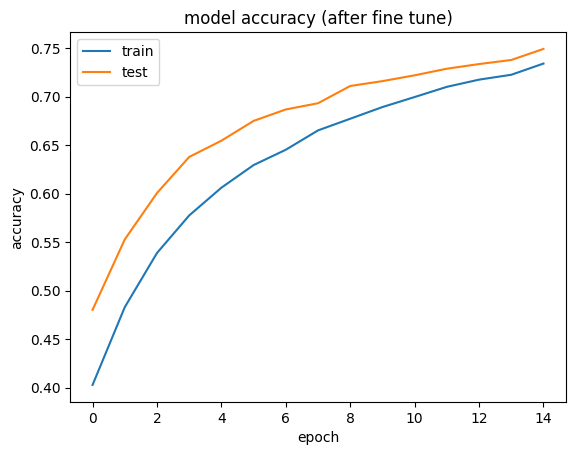

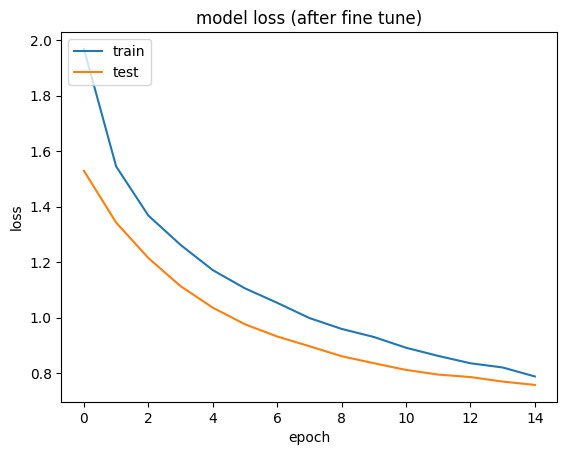

In [19]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy (after fine tune)')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss (after fine tune)')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()